# CICIDS2017

## importing required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import imputation
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense 
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

Using TensorFlow backend.
/Users/manishanker.talusani/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/manishanker.talusani/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/manishanker.talusani/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])

### Creating a dataframe with DoS:

In [4]:
Dos_df = pd.read_csv("Dos.csv", delimiter=",", header='infer')

/Users/manishanker.talusani/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
Dos_df[Dos_df["Flow Bytes/s"] == 'Infinity']

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
1392,49333,0,2,0,37,0,31,6,18.5,17.67767,0,0,0.0,0.0,Infinity,Infinity,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,1,0,0,0,40,0,0.0,0.0,6,31,22.666667,14.433757,208.333333,0,1,0,0,1,0,0,0,0,34.0,18.5,0.0,40,0,0,0,0,0,0,2,37,0,0,110,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2041,443,0,1,1,6,6,6,6,6.0,0.00000,6,6,6.0,0.0,Infinity,Infinity,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,0.0,0.0,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,16077,76,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2395,49232,0,2,0,12,0,6,6,6.0,0.00000,0,0,0.0,0.0,Infinity,Infinity,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,40,0,0.0,0.0,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,127,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3097,21,0,1,1,6,6,6,6,6.0,0.00000,6,6,6.0,0.0,Infinity,Infinity,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,0.0,0.0,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,255,229,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3789,443,0,1,1,6,6,6,6,6.0,0.00000,6,6,6.0,0.0,Infinity,Infinity,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,0.0,0.0,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,255,110,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684953,42634,0,2,0,12,0,6,6,6.0,0.00000,0,0,0.0,0.0,Infinity,Infinity,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,40,0,0.0,0.0,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,256,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
685244,61647,0,1,1,6,6,6,6,6.0,0.00000,6,6,6.0,0.0,Infinity,Infinity,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,0.0,0.0,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,946,16425,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
686669,49234,0,2,0,124,0,62,62,62.0,0.00000,0,0,0.0,0.0,Infinity,Infinity,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,40,0,0.0,0.0,62,62,62.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,93.0,62.0,0.0,40,0,0,0,0,0,0,2,124,0,0,-1,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
686814,59112,0,1,1,6,6,6,6,6.0,0.00000,6,6,6.0,0.0,Infinity,Infinity,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,0.0,0.0,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,2760,16560,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [6]:
Dos_df[Dos_df[" Flow Packets/s"] == 'Infinity']

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
1392,49333,0,2,0,37,0,31,6,18.5,17.67767,0,0,0.0,0.0,Infinity,Infinity,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,1,0,0,0,40,0,0.0,0.0,6,31,22.666667,14.433757,208.333333,0,1,0,0,1,0,0,0,0,34.0,18.5,0.0,40,0,0,0,0,0,0,2,37,0,0,110,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2041,443,0,1,1,6,6,6,6,6.0,0.00000,6,6,6.0,0.0,Infinity,Infinity,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,0.0,0.0,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,16077,76,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2395,49232,0,2,0,12,0,6,6,6.0,0.00000,0,0,0.0,0.0,Infinity,Infinity,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,40,0,0.0,0.0,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,127,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3097,21,0,1,1,6,6,6,6,6.0,0.00000,6,6,6.0,0.0,Infinity,Infinity,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,0.0,0.0,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,255,229,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3789,443,0,1,1,6,6,6,6,6.0,0.00000,6,6,6.0,0.0,Infinity,Infinity,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,0.0,0.0,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,255,110,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685244,61647,0,1,1,6,6,6,6,6.0,0.00000,6,6,6.0,0.0,Infinity,Infinity,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,0.0,0.0,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,946,16425,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
686669,49234,0,2,0,124,0,62,62,62.0,0.00000,0,0,0.0,0.0,Infinity,Infinity,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,40,0,0.0,0.0,62,62,62.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,93.0,62.0,0.0,40,0,0,0,0,0,0,2,124,0,0,-1,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
686806,33238,0,1,1,0,0,0,0,0.0,0.00000,0,0,0.0,0.0,NaN,Infinity,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,32,32,0.0,0.0,0,0,0.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,1,0.0,0.0,0.0,32,0,0,0,0,0,0,1,0,1,0,7635,40764,0,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
686814,59112,0,1,1,6,6,6,6,6.0,0.00000,6,6,6.0,0.0,Infinity,Infinity,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,0.0,0.0,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,2760,16560,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [7]:
type(Dos_df.iloc[686806, 14])

float

In [8]:
print(pd.DataFrame(Dos_df.loc[686806, :]).T)

        Destination Port  Flow Duration  Total Fwd Packets  Total Backward Packets Total Length of Fwd Packets  Total Length of Bwd Packets  Fwd Packet Length Max  Fwd Packet Length Min  Fwd Packet Length Mean  Fwd Packet Length Std Bwd Packet Length Max  Bwd Packet Length Min  Bwd Packet Length Mean  Bwd Packet Length Std Flow Bytes/s  Flow Packets/s  Flow IAT Mean  Flow IAT Std  Flow IAT Max  Flow IAT Min Fwd IAT Total  Fwd IAT Mean  Fwd IAT Std  Fwd IAT Max  Fwd IAT Min Bwd IAT Total  Bwd IAT Mean  Bwd IAT Std  Bwd IAT Max  Bwd IAT Min Fwd PSH Flags  Bwd PSH Flags  Fwd URG Flags  Bwd URG Flags  Fwd Header Length  Bwd Header Length Fwd Packets/s  Bwd Packets/s  Min Packet Length  Max Packet Length  Packet Length Mean  Packet Length Std  Packet Length Variance FIN Flag Count  SYN Flag Count  RST Flag Count  PSH Flag Count  ACK Flag Count  URG Flag Count  CWE Flag Count  ECE Flag Count  Down/Up Ratio  Average Packet Size  Avg Fwd Segment Size  Avg Bwd Segment Size  Fwd Header Length.1 

In [9]:
for column in Dos_df.columns[:-1]:
    Dos_df[column] = pd.to_numeric(Dos_df[column], errors="coerce")

In [10]:
Dos_df[Dos_df[" Flow Packets/s"] == 'Infinity']

/Users/manishanker.talusani/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label


In [11]:
Dos_df[Dos_df["Flow Bytes/s"] == 'Infinity']

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label


In [12]:
Dos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692703 entries, 0 to 692702
Data columns (total 79 columns):
 Destination Port               692703 non-null int64
 Flow Duration                  692703 non-null int64
 Total Fwd Packets              692703 non-null int64
 Total Backward Packets         692703 non-null int64
Total Length of Fwd Packets     692703 non-null int64
 Total Length of Bwd Packets    692703 non-null int64
 Fwd Packet Length Max          692703 non-null int64
 Fwd Packet Length Min          692703 non-null int64
 Fwd Packet Length Mean         692703 non-null float64
 Fwd Packet Length Std          692703 non-null float64
Bwd Packet Length Max           692703 non-null int64
 Bwd Packet Length Min          692703 non-null int64
 Bwd Packet Length Mean         692703 non-null float64
 Bwd Packet Length Std          692703 non-null float64
Flow Bytes/s                    691406 non-null float64
 Flow Packets/s                 691406 non-null float64
 Flow IAT Mea

In [13]:
Dos_df[" Label"].value_counts()

BENIGN              440031
DoS Hulk            231073
DoS GoldenEye       10293 
DoS slowloris       5796  
DoS Slowhttptest    5499  
Heartbleed          11    
Name:  Label, dtype: int64

### Creating a dataframe containing DDoS and BENIGN:

In [14]:
DDos_df = pd.read_csv("DDos.csv", sep=",", header='infer') 

In [15]:
DDos_df[DDos_df["Flow Bytes/s"] == 'Infinity']

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
65,55043,0,2,0,12,0,6,6,6.0,0.000000,0,0,0.0,0.0,Infinity,Infinity,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,40,0,0.0,0.0,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,4737,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1767,60018,0,2,0,12,0,6,6,6.0,0.000000,0,0,0.0,0.0,Infinity,Infinity,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,40,0,0.0,0.0,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,5114,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1890,80,0,1,1,6,6,6,6,6.0,0.000000,6,6,6.0,0.0,Infinity,Infinity,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,0.0,0.0,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,258,335,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3375,443,0,1,1,6,6,6,6,6.0,0.000000,6,6,6.0,0.0,Infinity,Infinity,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,0.0,0.0,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,252,114,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
8057,35382,0,1,1,6,0,6,6,6.0,0.000000,0,0,0.0,0.0,Infinity,Infinity,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,32,0.0,0.0,0,6,4.000000,3.464102,12.000000,1,0,0,0,0,0,0,0,1,6.0,6.0,0.0,20,0,0,0,0,0,0,1,6,1,0,0,322,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
8405,55421,0,2,0,20,0,14,6,10.0,5.656854,0,0,0.0,0.0,Infinity,Infinity,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,1,0,0,0,40,0,0.0,0.0,6,14,11.333333,4.618802,21.333333,0,1,0,0,1,0,0,0,0,17.0,10.0,0.0,40,0,0,0,0,0,0,2,20,0,0,229,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
13313,9242,0,2,0,12,0,6,6,6.0,0.000000,0,0,0.0,0.0,Infinity,Infinity,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,40,0,0.0,0.0,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,152,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
13716,389,0,2,0,7,0,7,0,3.5,4.949747,0,0,0.0,0.0,Infinity,Infinity,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,1,0,0,0,64,0,0.0,0.0,0,7,4.666667,4.041452,16.333333,0,1,0,0,1,0,0,0,0,7.0,3.5,0.0,64,0,0,0,0,0,0,2,7,0,0,237,-1,0,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
18253,57919,0,2,0,12,0,6,6,6.0,0.000000,0,0,0.0,0.0,Infinity,Infinity,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,40,0,0.0,0.0,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,131,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
33330,59646,0,2,0,31,0,31,0,15.5,21.920310,0,0,0.0,0.0,Infinity,Infinity,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,1,0,0,0,64,0,0.0,0.0,0,31,20.666667,17.897858,320.333333,0,1,0,0,1,0,0,0,0,31.0,15.5,0.0,64,0,0,0,0,0,0,2,31,0,0,59,-1,0,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [16]:
DDos_df[DDos_df[" Flow Packets/s"] == 'Infinity']

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
65,55043,0,2,0,12,0,6,6,6.0,0.000000,0,0,0.0,0.0,Infinity,Infinity,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,40,0,0.0,0.0,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,4737,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1767,60018,0,2,0,12,0,6,6,6.0,0.000000,0,0,0.0,0.0,Infinity,Infinity,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,40,0,0.0,0.0,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,5114,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1890,80,0,1,1,6,6,6,6,6.0,0.000000,6,6,6.0,0.0,Infinity,Infinity,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,0.0,0.0,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,258,335,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3375,443,0,1,1,6,6,6,6,6.0,0.000000,6,6,6.0,0.0,Infinity,Infinity,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,0.0,0.0,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,252,114,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
6796,36812,0,2,0,0,0,0,0,0.0,0.000000,0,0,0.0,0.0,NaN,Infinity,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,64,0,0.0,0.0,0,0,0.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,0.0,0.0,0.0,64,0,0,0,0,0,0,2,0,0,0,7633,-1,0,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
8057,35382,0,1,1,6,0,6,6,6.0,0.000000,0,0,0.0,0.0,Infinity,Infinity,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,32,0.0,0.0,0,6,4.000000,3.464102,12.000000,1,0,0,0,0,0,0,0,1,6.0,6.0,0.0,20,0,0,0,0,0,0,1,6,1,0,0,322,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
8405,55421,0,2,0,20,0,14,6,10.0,5.656854,0,0,0.0,0.0,Infinity,Infinity,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,1,0,0,0,40,0,0.0,0.0,6,14,11.333333,4.618802,21.333333,0,1,0,0,1,0,0,0,0,17.0,10.0,0.0,40,0,0,0,0,0,0,2,20,0,0,229,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
13313,9242,0,2,0,12,0,6,6,6.0,0.000000,0,0,0.0,0.0,Infinity,Infinity,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,40,0,0.0,0.0,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,152,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
13716,389,0,2,0,7,0,7,0,3.5,4.949747,0,0,0.0,0.0,Infinity,Infinity,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,1,0,0,0,64,0,0.0,0.0,0,7,4.666667,4.041452,16.333333,0,1,0,0,1,0,0,0,0,7.0,3.5,0.0,64,0,0,0,0,0,0,2,7,0,0,237,-1,0,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
14739,53581,0,1,1,0,0,0,0,0.0,0.000000,0,0,0.0,0.0,NaN,Infinity,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,44,32,0.0,0.0,0,0,0.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,1,0.0,0.0,0.0,44,0,0,0,0,0,0,1,0,1,0,408,65535,0,44,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [17]:
for column in DDos_df.columns[:-1]:
    DDos_df[column] = pd.to_numeric(DDos_df[column], errors="coerce")

In [18]:
DDos_df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,33,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.100917e+05,18348.62385,109.0,0.0,109,109,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,9174.311927,9174.311927,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,2.307692e+05,38461.53846,52.0,0.0,52,52,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,19230.769230,19230.769230,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,3.529412e+05,58823.52941,34.0,0.0,34,34,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,29411.764710,29411.764710,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,31,329,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,32,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [19]:
DDos_df[" Label"].value_counts()

DDoS      128027
BENIGN    97718 
Name:  Label, dtype: int64

### Creating a dataframe with Benign and Portscan

In [20]:
PortScan_df = pd.read_csv("PortScan.csv", sep=",", header='infer')

In [21]:
PortScan_df.shape

(286467, 79)

In [22]:
PortScan_df[PortScan_df["Flow Bytes/s"] == 'Infinity']

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
248,5002,0,1,1,6,6,6,6,6.0,0.000000,6,6,6.0,0.0,Infinity,Infinity,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,0.0,0.0,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,2049,16150,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
5005,54304,0,2,0,37,0,31,6,18.5,17.677670,0,0,0.0,0.0,Infinity,Infinity,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,1,0,0,0,40,0,0.0,0.0,6,31,22.666667,14.433757,208.333333,0,1,0,0,1,0,0,0,0,34.0,18.5,0.0,40,0,0,0,0,0,0,2,37,0,0,62,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
11482,7046,0,2,0,12,0,6,6,6.0,0.000000,0,0,0.0,0.0,Infinity,Infinity,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,40,0,0.0,0.0,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,5141,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
17310,54557,0,2,0,12,0,6,6,6.0,0.000000,0,0,0.0,0.0,Infinity,Infinity,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,40,0,0.0,0.0,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,351,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
22471,80,0,1,1,6,6,6,6,6.0,0.000000,6,6,6.0,0.0,Infinity,Infinity,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,0.0,0.0,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,256,58,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278979,51396,0,2,0,12,0,6,6,6.0,0.000000,0,0,0.0,0.0,Infinity,Infinity,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,40,0,0.0,0.0,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,256,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
279129,49884,0,2,0,14,0,14,0,7.0,9.899495,0,0,0.0,0.0,Infinity,Infinity,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,1,0,0,0,64,0,0.0,0.0,0,14,9.333333,8.082904,65.333333,0,1,0,0,1,0,0,0,0,14.0,7.0,0.0,64,0,0,0,0,0,0,2,14,0,0,227,-1,0,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
281744,443,0,2,0,12,0,6,6,6.0,0.000000,0,0,0.0,0.0,Infinity,Infinity,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,40,0,0.0,0.0,6,6,6.000000,0.000000,0.000000,1,0,0,0,0,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,0,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
282054,443,0,2,0,12,0,6,6,6.0,0.000000,0,0,0.0,0.0,Infinity,Infinity,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,40,0,0.0,0.0,6,6,6.000000,0.000000,0.000000,1,0,0,0,0,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,0,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [23]:
PortScan_df[PortScan_df[" Flow Packets/s"] == 'Infinity']

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
248,5002,0,1,1,6,6,6,6,6.0,0.000000,6,6,6.0,0.0,Infinity,Infinity,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,0.0,0.0,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,2049,16150,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
5005,54304,0,2,0,37,0,31,6,18.5,17.677670,0,0,0.0,0.0,Infinity,Infinity,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,1,0,0,0,40,0,0.0,0.0,6,31,22.666667,14.433757,208.333333,0,1,0,0,1,0,0,0,0,34.0,18.5,0.0,40,0,0,0,0,0,0,2,37,0,0,62,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
11482,7046,0,2,0,12,0,6,6,6.0,0.000000,0,0,0.0,0.0,Infinity,Infinity,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,40,0,0.0,0.0,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,5141,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
12824,13370,0,2,0,0,0,0,0,0.0,0.000000,0,0,0.0,0.0,NaN,Infinity,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,64,0,0.0,0.0,0,0,0.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,0,0.0,0.0,0.0,64,0,0,0,0,0,0,2,0,0,0,65535,-1,0,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
12827,52508,0,1,1,0,0,0,0,0.0,0.000000,0,0,0.0,0.0,NaN,Infinity,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,32,32,0.0,0.0,0,0,0.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,1,0.0,0.0,0.0,32,0,0,0,0,0,0,1,0,1,0,227,65535,0,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278979,51396,0,2,0,12,0,6,6,6.0,0.000000,0,0,0.0,0.0,Infinity,Infinity,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,40,0,0.0,0.0,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,256,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
279129,49884,0,2,0,14,0,14,0,7.0,9.899495,0,0,0.0,0.0,Infinity,Infinity,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,1,0,0,0,64,0,0.0,0.0,0,14,9.333333,8.082904,65.333333,0,1,0,0,1,0,0,0,0,14.0,7.0,0.0,64,0,0,0,0,0,0,2,14,0,0,227,-1,0,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
281744,443,0,2,0,12,0,6,6,6.0,0.000000,0,0,0.0,0.0,Infinity,Infinity,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,40,0,0.0,0.0,6,6,6.000000,0.000000,0.000000,1,0,0,0,0,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,0,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
282054,443,0,2,0,12,0,6,6,6.0,0.000000,0,0,0.0,0.0,Infinity,Infinity,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,40,0,0.0,0.0,6,6,6.000000,0.000000,0.000000,1,0,0,0,0,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,0,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [24]:
for column in PortScan_df.columns[:-1]:
    PortScan_df[column] = pd.to_numeric(PortScan_df[column], errors="coerce")

In [25]:
PortScan_df[PortScan_df["Flow Bytes/s"] == 'Infinity']

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label


In [26]:
PortScan_df[PortScan_df[" Flow Packets/s"] == 'Infinity']

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label


In [27]:
PortScan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286467 entries, 0 to 286466
Data columns (total 79 columns):
 Destination Port               286467 non-null int64
 Flow Duration                  286467 non-null int64
 Total Fwd Packets              286467 non-null int64
 Total Backward Packets         286467 non-null int64
Total Length of Fwd Packets     286467 non-null int64
 Total Length of Bwd Packets    286467 non-null int64
 Fwd Packet Length Max          286467 non-null int64
 Fwd Packet Length Min          286467 non-null int64
 Fwd Packet Length Mean         286467 non-null float64
 Fwd Packet Length Std          286467 non-null float64
Bwd Packet Length Max           286467 non-null int64
 Bwd Packet Length Min          286467 non-null int64
 Bwd Packet Length Mean         286467 non-null float64
 Bwd Packet Length Std          286467 non-null float64
Flow Bytes/s                    286096 non-null float64
 Flow Packets/s                 286096 non-null float64
 Flow IAT Mea

### Abnormal labeling of the attack traffic and labeling the traffic that is BENIGN as Normal and creating the dataframe:

In [28]:
NA_df = pd.concat([Dos_df, DDos_df, PortScan_df], ignore_index=True)
NA_df[' Label']=NA_df[' Label'].apply({'DoS':'Anormal','BENIGN':'Normal' ,'DDoS':'Anormal', 'PortScan':'Anormal'}.get)
NA_df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,6,6,6.000000,0.000000,3.132505e+02,52.208416,38308.000000,0.000000,38308,38308,0,0.000000,0.000000,0,0,0,0.000000,0.000000,0,0,0,0,0,0,20,20,26.104208,26.104208,6,6,6.000000,0.000000,0.000000e+00,0,0,0,0,1,1,0,0,1,9.000000,6.000000,6.000000,20,0,0,0,0,0,0,1,6,1,6,255,946,0,20,0.0,0.0,0,0,0.0,0.0,0,0,Normal
1,389,479,11,5,172,326,79,0,15.636364,31.449238,163,0,65.200000,89.278777,1.039666e+06,33402.922760,31.933333,25.510409,73,0,479,47.900000,38.942836,109,1,401,100.250000,101.736178,237,3,0,0,0,0,368,176,22964.509390,10438.413360,0,163,29.294118,56.529599,3.195596e+03,0,0,0,1,0,0,0,0,0,31.125000,15.636364,65.200000,368,0,0,0,0,0,0,11,172,5,326,29200,260,4,32,0.0,0.0,0,0,0.0,0.0,0,0,Normal
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,1575,0,525.000000,813.326503,5.753425e+06,14611.872150,73.000000,204.960972,810,1,1095,121.666667,298.746130,915,1,995,199.000000,345.535092,810,3,0,0,0,0,336,208,9132.420091,5479.452055,0,1575,370.588235,671.751541,4.512501e+05,0,0,0,1,0,0,0,0,0,393.750000,315.000000,525.000000,336,0,0,0,0,0,0,10,3150,6,3150,29200,2081,3,32,0.0,0.0,0,0,0.0,0.0,0,0,Normal
3,389,15206,17,12,3452,6660,1313,0,203.058824,425.778474,3069,0,555.000000,977.480342,6.650007e+05,1907.141918,543.071429,2519.931377,13391,0,15206,950.375000,3322.417812,13391,2,15112,1373.818182,4176.449588,13961,3,0,0,0,0,560,388,1117.979745,789.162173,0,3069,337.066667,704.654082,4.965374e+05,0,0,0,1,0,0,0,0,0,348.689655,203.058824,555.000000,560,0,0,0,0,0,0,17,3452,12,6660,29200,0,10,32,0.0,0.0,0,0,0.0,0.0,0,0,Normal
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,1576,0,525.333333,813.842901,5.771062e+06,13736.263740,78.000000,207.000929,794,1,1092,136.500000,313.850738,910,1,1015,203.000000,333.240154,794,3,0,0,0,0,304,208,8241.758242,5494.505495,0,1576,393.875000,704.585067,4.964401e+05,0,0,0,1,0,0,0,0,0,420.133333,350.000000,525.333333,304,0,0,0,0,0,0,9,3150,6,3152,29200,2081,2,32,0.0,0.0,0,0,0.0,0.0,0,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204910,443,196135,49,57,1331,105841,570,0,27.163265,108.067176,4344,0,1856.859649,972.796621,5.464196e+05,540.444082,1867.952381,7207.469062,53438,1,196135,4086.145833,10366.095180,53521,1,172901,3087.517857,9307.416597,53438,2,0,0,0,0,1252,1832,249.827925,290.616157,0,4344,1001.607477,1160.591064,1.346972e+06,0,0,0,1,0,0,0,0,1,1011.056604,27.163265,1856.859649,1252,0,0,0,0,0,

In [29]:
NA_df.shape

(1204915, 79)

In [30]:
NA_df[" Label"].value_counts()

Normal     665286
Anormal    286957
Name:  Label, dtype: int64

In [31]:
NA_df[NA_df["Flow Bytes/s"] == 'Infinity']

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label


In [32]:
NA_df[NA_df[" Flow Packets/s"] == 'Infinity']

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label


In [33]:
NA_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204915 entries, 0 to 1204914
Data columns (total 79 columns):
 Destination Port               1204915 non-null int64
 Flow Duration                  1204915 non-null int64
 Total Fwd Packets              1204915 non-null int64
 Total Backward Packets         1204915 non-null int64
Total Length of Fwd Packets     1204915 non-null int64
 Total Length of Bwd Packets    1204915 non-null int64
 Fwd Packet Length Max          1204915 non-null int64
 Fwd Packet Length Min          1204915 non-null int64
 Fwd Packet Length Mean         1204915 non-null float64
 Fwd Packet Length Std          1204915 non-null float64
Bwd Packet Length Max           1204915 non-null int64
 Bwd Packet Length Min          1204915 non-null int64
 Bwd Packet Length Mean         1204915 non-null float64
 Bwd Packet Length Std          1204915 non-null float64
Flow Bytes/s                    1203213 non-null float64
 Flow Packets/s                 1203213 non-null flo

In [34]:
pd.DataFrame(NA_df.isna().sum()).T

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1702,1702,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,252672


## Lot of NA values in Label column. Remove those rows

In [35]:
NA = NA_df.dropna()

In [36]:
NA.shape

(951490, 79)

In [37]:
pd.DataFrame(NA.isna().sum()).T

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
#NA_filtered = NA_df[~NA_df.isin([np.nan, np.inf, -np.inf]).any(1)]

## Methods I wrote for algorithms

Since PCA yields a feature subspace that maximizes the variance along the axes, it makes sense to standardize the data, especially, if it was measured on different scales.

Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual feature do not more or less look like standard normally distributed data

### Only label is categorical, everything else is continuous

In [65]:
def train_test_dataset_with_pca(df):
    df.fillna(method='ffill')
    labelencoder = LabelEncoder()
    df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:, -1])
    X = df.drop([' Label'],axis=1) 
    y = df.iloc[:, -1].values.reshape(-1,1)
    y=np.ravel(y)
    X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 0, stratify = y)
    scaler = StandardScaler()
    scaler.partial_fit(X_train)
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    pca = PCA(.95)
    pca.fit(X_train)
    X_train = pca.transform(X_train)
    X_test = pca.transform(X_test)
    return  X_train, X_test, y_train, y_test

In [40]:
def train_test_dataset(df):
    labelencoder = LabelEncoder()
    df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:, -1])
    X = df.drop([' Label'],axis=1) 
    y = df.iloc[:, -1].values.reshape(-1,1)
    y=np.ravel(y)
    X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 0, stratify = y)
    return  X_train, X_test, y_train, y_test

In [41]:
def RandomForest(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(random_state = 0)
#     imputer = imputation(missing_values="NaN", strategy = "mean")
#     imputer = imputer.fit(X_train)
#     X_train = imputer.transform(X_train)
#     X_test = imputer.transform(X_test)
    rf.fit(X_train,y_train) # modelin veri üzerinde öğrenmesi fit fonksiyonuyla yapılıyor
    rf_score=rf.score(X_test,y_test)
    y_predict=rf.predict(X_test)
    y_true=y_test
    print('Random Forest Accuracy:'+ str(rf_score))
    precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
    print('Random Forest precision_recall_fscore:'+(str(precision))+(str(recall))+(str(fscore)))
    
    cm=confusion_matrix(y_true,y_predict)
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    plt.show()
    return rf_score,precision,recall,fscore,none
    

In [42]:
def DecisionTree(X_train, X_test, y_train, y_test):
    dt = DecisionTreeClassifier(random_state = 0)
#     imputer = Imputer(missing_values="NaN", strategy = "mean")
#     imputer = imputer.fit(X_train)
#     X_train = imputer.transform(X_train)
#     X_test = imputer.transform(X_test)
    dt.fit(X_train, y_train)
    score=dt.score(X_test,y_test)
    print('Decision Tree Accuracy:'+ str(score))
   # print('Decision Tree Accuracy2:'+ str(accuracy_score(y_test, y_predict)))
    y_predict=dt.predict(X_test)
    y_true=y_test
    precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
    print('Decision Tree precision_recall_fscore:'+(str(precision))+(str(recall))+(str(fscore)))
    cm=confusion_matrix(y_true,y_predict)
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    plt.show()
    return score,precision,recall,fscore,none

In [43]:
def kNN(X_train, X_test, y_train, y_test):
    knn=KNeighborsClassifier(n_neighbors=5)
#     imputer = Imputer(missing_values="NaN", strategy = "mean")
#     imputer = imputer.fit(X_train)
#     X_train = imputer.transform(X_train)
#     X_test = imputer.transform(X_test)
    knn.fit(X_train,y_train) 
    prediction=knn.predict(X_test)
    score=knn.score(X_test,y_test)
    print("5 nn score:"+ str(score))
    y_predict=knn.predict(X_test)
    y_true=y_test
    precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
    print('5nn precision_recall_fscore:'+(str(precision))+(str(recall))+(str(fscore)))
    cm=confusion_matrix(y_true,y_predict)
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    plt.show()
    return score,precision,recall,fscore,none
    

In [44]:
def SVM(X_train, X_test, y_train, y_test):
    svclassifier = SVC(kernel='linear')  
#     imputer = Imputer(missing_values="NaN", strategy = "mean")
#     imputer = imputer.fit(X_train)
#     X_train = imputer.transform(X_train)
#     X_test = imputer.transform(X_test)
    svclassifier.fit(X_train, y_train) 
    print("SVM Classification Accuracy:"+ str(svclassifier.score(X_test,y_test)))
    y_predict = svclassifier.predict(X_test)  
    y_true=y_test
    cm=confusion_matrix(y_true,y_predict)
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    plt.show()

In [45]:
def build_classifier(X_train):
    def bm():
        classifier = Sequential() # initialize neural network
        classifier.add(Dense(units = 80, kernel_initializer = 'uniform', activation = 'relu', input_dim = X_train.shape[1]))
        classifier.add(Dense(units = 25, kernel_initializer = 'uniform', activation = 'relu'))              
       # classifier.add(Dense(units = 25, kernel_initializer = 'uniform', activation = 'relu'))
        classifier.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'softmax'))
        lr=.003
        adam0=Adam(lr=lr)

        classifier.compile(optimizer =adam0, loss = 'categorical_crossentropy', metrics = ['accuracy'])
        return classifier
    return bm

In [46]:
def ANN(X_train, X_test, y_train, y_test):
    y_ = to_categorical(y_train)
    y_t=to_categorical(y_test)
    estimator  = KerasClassifier(build_fn = build_classifier(X_train), epochs = 5)
    accuracies = cross_val_score(estimator, X = X_train, y = y_, cv = 3)
    mean = accuracies.mean()
    variance = accuracies.std()
    print("Accuracy mean: "+ str(mean))
    print("Accuracy variance: "+ str(variance))
    

In [47]:
def feature_selection(df):
    feature=(df.drop([' Label'],axis=1)).columns.values
    labelencoder = LabelEncoder()
    df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:, -1])
    X = df.drop([' Label'],axis=1) 
    Y = df.iloc[:, -1].values.reshape(-1,1)
    Y=np.ravel(Y)
#     imputer = Imputer(missing_values="NaN", strategy = "mean")
#     imputer = imputer.fit(X)
#     X = imputer.transform(X)
    rf = RandomForestRegressor()
    rf.fit(X, Y)
    print ("Features sorted by their score:")
    print (sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), feature), reverse=True))

In [48]:
def remove_nan_inf(df):
    return df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]

In [49]:
df = remove_nan_inf(NA)

In [50]:
df.shape

(951490, 79)

In [51]:
#df.to_csv('dataset_cleaned.csv', sep=',', encoding='utf-8', index=False)

In [52]:
df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,6,6,6.000000,0.000000,3.132505e+02,52.208416,38308.000000,0.000000,38308,38308,0,0.000000,0.000000,0,0,0,0.000000,0.000000,0,0,0,0,0,0,20,20,26.104208,26.104208,6,6,6.000000,0.000000,0.000000e+00,0,0,0,0,1,1,0,0,1,9.000000,6.000000,6.000000,20,0,0,0,0,0,0,1,6,1,6,255,946,0,20,0.0,0.0,0,0,0.0,0.0,0,0,Normal
1,389,479,11,5,172,326,79,0,15.636364,31.449238,163,0,65.200000,89.278777,1.039666e+06,33402.922760,31.933333,25.510409,73,0,479,47.900000,38.942836,109,1,401,100.250000,101.736178,237,3,0,0,0,0,368,176,22964.509390,10438.413360,0,163,29.294118,56.529599,3.195596e+03,0,0,0,1,0,0,0,0,0,31.125000,15.636364,65.200000,368,0,0,0,0,0,0,11,172,5,326,29200,260,4,32,0.0,0.0,0,0,0.0,0.0,0,0,Normal
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,1575,0,525.000000,813.326503,5.753425e+06,14611.872150,73.000000,204.960972,810,1,1095,121.666667,298.746130,915,1,995,199.000000,345.535092,810,3,0,0,0,0,336,208,9132.420091,5479.452055,0,1575,370.588235,671.751541,4.512501e+05,0,0,0,1,0,0,0,0,0,393.750000,315.000000,525.000000,336,0,0,0,0,0,0,10,3150,6,3150,29200,2081,3,32,0.0,0.0,0,0,0.0,0.0,0,0,Normal
3,389,15206,17,12,3452,6660,1313,0,203.058824,425.778474,3069,0,555.000000,977.480342,6.650007e+05,1907.141918,543.071429,2519.931377,13391,0,15206,950.375000,3322.417812,13391,2,15112,1373.818182,4176.449588,13961,3,0,0,0,0,560,388,1117.979745,789.162173,0,3069,337.066667,704.654082,4.965374e+05,0,0,0,1,0,0,0,0,0,348.689655,203.058824,555.000000,560,0,0,0,0,0,0,17,3452,12,6660,29200,0,10,32,0.0,0.0,0,0,0.0,0.0,0,0,Normal
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,1576,0,525.333333,813.842901,5.771062e+06,13736.263740,78.000000,207.000929,794,1,1092,136.500000,313.850738,910,1,1015,203.000000,333.240154,794,3,0,0,0,0,304,208,8241.758242,5494.505495,0,1576,393.875000,704.585067,4.964401e+05,0,0,0,1,0,0,0,0,0,420.133333,350.000000,525.333333,304,0,0,0,0,0,0,9,3150,6,3152,29200,2081,2,32,0.0,0.0,0,0,0.0,0.0,0,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204910,443,196135,49,57,1331,105841,570,0,27.163265,108.067176,4344,0,1856.859649,972.796621,5.464196e+05,540.444082,1867.952381,7207.469062,53438,1,196135,4086.145833,10366.095180,53521,1,172901,3087.517857,9307.416597,53438,2,0,0,0,0,1252,1832,249.827925,290.616157,0,4344,1001.607477,1160.591064,1.346972e+06,0,0,0,1,0,0,0,0,1,1011.056604,27.163265,1856.859649,1252,0,0,0,0,0,

Creating Train and Test datasets for all dataframes

In [53]:
# DoSX_train, DoSX_test, DoSy_train, DoSy_test=train_test_dataset(remove_nan_inf(DoS_df))
# DDoSX_train, DDoSX_test, DDoSy_train, DDoSy_test=train_test_dataset(remove_nan_inf(DDoS_df))
# PS_X_train,PS_X_test,PS_y_train, PS_y_test=train_test_dataset(remove_nan_inf(PortScan_df))
NA_X_train, NA_X_test, NA_y_train, NA_y_test=train_test_dataset(df)

In [54]:
NA_X_train.shape

(666043, 78)

In [55]:
NA_X_train.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
1023119,26214,26,1,1,2,6,2,2,2.0,0.0,6,6,6.0,0.0,307692.307700,76923.076920,2.600000e+01,0.000000e+00,26,26,0,0.000,0.000,0,0,0,0.0,0.0,0,0,0,0,0,0,24,20,38461.538460,38461.538460,2,6,3.333333,2.309401,5.333333,0,0,0,1,0,0,0,0,1,5.00,2.0,6.0,24,0,0,0,0,0,0,1,2,1,6,1024,0,0,24,0.0,0.0,0,0,0.0,0.0,0,0
851711,80,98970,5,0,30,0,6,6,6.0,0.0,0,0,0.0,0.0,303.122158,50.520360,2.474250e+04,4.819782e+04,97036,1,98970,24742.500,48197.816,97036,1,0,0.0,0.0,0,0,0,0,0,0,100,0,50.520360,0.000000,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,7.20,6.0,0.0,100,0,0,0,0,0,0,5,30,0,0,256,-1,4,20,0.0,0.0,0,0,0.0,0.0,0,0
704673,53,23748,2,2,82,248,41,41,41.0,0.0,124,124,124.0,0.0,13895.907020,168.435237,7.916000e+03,1.366676e+04,23697,4,4,4.000,0.000,4,4,47,47.0,0.0,47,47,0,0,0,0,40,40,84.217618,84.217618,41,124,74.200000,45.460972,2066.700000,0,0,0,0,0,0,0,0,1,92.75,41.0,124.0,40,0,0,0,0,0,0,2,82,2,248,-1,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0
524757,53,23479,2,2,74,218,37,37,37.0,0.0,109,109,109.0,0.0,12436.645510,170.365007,7.826333e+03,1.354868e+04,23471,4,4,4.000,0.000,4,4,4,4.0,0.0,4,4,0,0,0,0,40,40,85.182504,85.182504,37,109,65.800000,39.436024,1555.200000,0,0,0,0,0,0,0,0,1,82.25,37.0,109.0,40,0,0,0,0,0,0,2,74,2,218,-1,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0
783441,80,7901770,4,0,24,0,6,6,6.0,0.0,0,0,0.0,0.0,3.037294,0.506216,2.633923e+06,4.561194e+06,7900736,4,7901770,2633923.333,4561193.595,7900736,4,0,0.0,0.0,0,0,0,0,0,0,80,0,0.506216,0.000000,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,7.50,6.0,0.0,80,0,0,0,0,0,0,4,24,0,0,256,-1,3,20,1034.0,0.0,1034,1034,7900736.0,0.0,7900736,7900736


In [56]:
NA_y_test

array([0, 0, 0, ..., 1, 0, 1])

In [57]:
pd.DataFrame(NA_X_train.isnull().any()).T

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


### Algorithms for Normal and Abnormal dataframe:

/Users/manishanker.talusani/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest Accuracy:0.9998808885712585
Random Forest precision_recall_fscore:0.99988088804527420.99988088857125850.9998808862102966


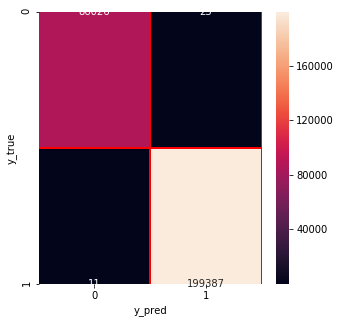

In [58]:
narf_score,narf_precision,narf_recall,narf_fscore,none=RandomForest(NA_X_train, NA_X_test, NA_y_train, NA_y_test)

Decision Tree Accuracy:0.9998843918485744
Decision Tree precision_recall_fscore:0.99988439325634830.99988439184857440.9998843924213506


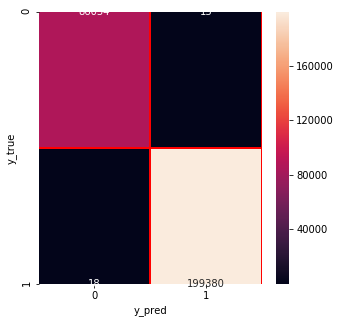

In [59]:
nadt_score,nadt_precision,nadt_recall,nadt_fscore,none=DecisionTree(NA_X_train, NA_X_test, NA_y_train, NA_y_test)

5 nn score:0.9986091989055762
5nn precision_recall_fscore:0.99861058064743440.99860919890557620.9986095496910823


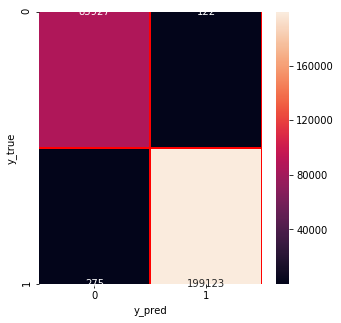

In [60]:
naKnn_score,naKnn_precision,naKnn_recall,naKnn_fscore,none=kNN(NA_X_train, NA_X_test, NA_y_train, NA_y_test)

In [61]:
#SVM(NA_X_train, NA_X_test, NA_y_train, NA_y_test) #svm 

In [62]:
ANN(NA_X_train, NA_X_test, NA_y_train, NA_y_test)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/5
444028/444028 [==============================] - 18s 40us/step - loss: 4.8578 - accuracy: 0.6986
Epoch 2/5
444028/444028 [==============================] - 17s 39us/step - loss: 4.8577 - accuracy: 0.6986
Epoch 3/5
444028/444028 [==============================] - 18s 40us/step - loss: 4.8577 - accuracy: 0.6986
Epoch 4/5
444028/444028 [==============================] - 18s 39us/step - loss: 4.8577 - accuracy: 0.6986
Epoch 5/5
222015/222015 [==============================] - 3s 15us/step
Epoch 1/5
444029/444029 [==============================] - 18s 41us/step - loss: 4.8473 - accuracy: 0.6992
Epoch 2/5
444029/444029 [==============================] - 17s 39us/step - loss: 4.8595 - accuracy: 0.6985
Epoch 3/5
444029/444029 [==============================] - 20s 44us/step - loss: 4.8595 - accuracy: 0.6985
Epoch 4/5
444029/444029 [==============================] - 

## Accuracy table

In [63]:
d={'Algoritm': ["Random Forest", "Decision Tree","KNN","ANN"], 
   'Normal/Anormal accuracy':[narf_score,nadt_score,naKnn_score, 0.69854],
  }
dataframe= pd.DataFrame(data=d)
dataframe

,Algoritm,Normal/Anormal accuracy
0,Random Forest,0.999881
1,Decision Tree,0.999884
2,KNN,0.998609
3,ANN,0.698540


# Now lets use PCA to reduce dimension to 95 % and run the above algorithms on the feature reduced dataset

In [67]:
NA_X_train, NA_X_test, NA_y_train, NA_y_test=train_test_dataset_with_pca(df)

In [74]:
NA_X_train.shape

(666043, 22)

### Algorithms for Normal and Abnormal dataframe:

/Users/manishanker.talusani/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest Accuracy:0.9998563656300469
Random Forest precision_recall_fscore:0.99985636393614540.99985636563004690.99985636302029


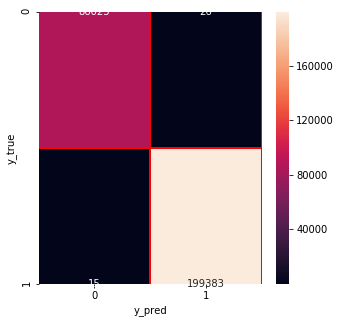

In [68]:
narf_score,narf_precision,narf_recall,narf_fscore,none=RandomForest(NA_X_train, NA_X_test, NA_y_train, NA_y_test)

Decision Tree Accuracy:0.9996496722684071
Decision Tree precision_recall_fscore:0.99964967469918860.99964967226840710.9996496734255449


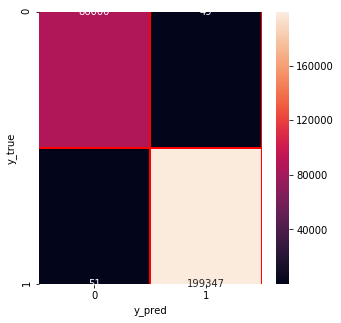

In [69]:
nadt_score,nadt_precision,nadt_recall,nadt_fscore,none=DecisionTree(NA_X_train, NA_X_test, NA_y_train, NA_y_test)

5 nn score:0.9997827968064124
5nn precision_recall_fscore:0.99978279835779040.99978279680641240.9997827975238377


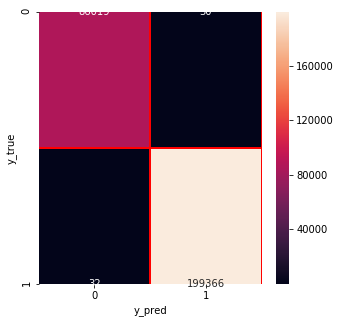

In [70]:
naKnn_score,naKnn_precision,naKnn_recall,naKnn_fscore,none=kNN(NA_X_train, NA_X_test, NA_y_train, NA_y_test)

In [ ]:
#SVM(NA_X_train, NA_X_test, NA_y_train, NA_y_test) #svm 

In [71]:
ANN(NA_X_train, NA_X_test, NA_y_train, NA_y_test)

Epoch 1/5
444028/444028 [==============================] - 18s 40us/step - loss: 0.0189 - accuracy: 0.9939
Epoch 2/5
444028/444028 [==============================] - 16s 37us/step - loss: 0.0109 - accuracy: 0.9963
Epoch 3/5
444028/444028 [==============================] - 17s 38us/step - loss: 0.0102 - accuracy: 0.9967
Epoch 4/5
444028/444028 [==============================] - 18s 40us/step - loss: 0.0087 - accuracy: 0.9972
Epoch 5/5
222015/222015 [==============================] - 3s 15us/step
Epoch 1/5
444029/444029 [==============================] - 19s 42us/step - loss: 0.0215 - accuracy: 0.9933
Epoch 2/5
444029/444029 [==============================] - 15s 35us/step - loss: 0.0129 - accuracy: 0.9960
Epoch 3/5
444029/444029 [==============================] - 15s 35us/step - loss: 0.0104 - accuracy: 0.9966
Epoch 4/5
444029/444029 [==============================] - 16s 37us/step - loss: 0.0103 - accuracy: 0.9970
Epoch 5/5
222014/222014 [==============================] - 3s 14us/step


# Accuracy table of the classification algorithms with PCA

In [73]:
d={'Algoritmalar': ["Random Forest", "Decision Tree","KNN","ANN"], 
   'Normal/Anormal accuracy':[narf_score,nadt_score,naKnn_score, 0.99610],
  }
dataframe= pd.DataFrame(data=d)
dataframe

,Algoritmalar,Normal/Anormal accuracy
0,Random Forest,0.999856
1,Decision Tree,0.999650
2,KNN,0.999783
3,ANN,0.996100


# Conclusion

1. PCA helps in reducing the number of columns from 78 to 22 by just reducing the information from 100% to 95%
2. Accuracy of Random forest algorithm goes from 0.999881 to 0.999856
3. Accuracy of Decision Tree goes from 0.999884 to 0.999650
4. Accuracy of KNN goes from 0.998609 to 0.999783
5. Accuracy of ANN (Artificial Neural network using Keras classifier) goes from 0.698540 to 0.996100